In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import wandb

In [3]:
mydata = pd.read_csv('/Users/anastasia/Dropbox/regression_so_samples_allsbjs_fixed.csv')

In [4]:
pd.options.display.max_rows = 15

In [5]:
mydata

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information
0,30.0,2,83,0,0,-2.445233,-3.155950,-2.710832,-2.962410,-4.462281,...,0.336799,0.316177,0.316998,0.660012,0.0,0.0,2.000000,0.0,NaN,NaN
1,29.9,2,83,0,0,-3.324564,-3.857711,-3.775982,-4.076556,-5.188734,...,0.539413,0.515705,0.532923,0.645414,0.0,0.0,0.333333,0.0,-0.000281,0.010573
2,29.8,2,83,0,0,-2.219338,-2.767709,-2.312887,-3.297628,-4.449349,...,0.287693,0.305671,0.334226,0.720780,0.0,0.0,0.500000,0.0,NaN,NaN
3,29.7,2,83,0,0,-2.727042,-3.262588,-2.936053,-3.311534,-4.602471,...,0.328391,0.316754,0.310106,0.680707,0.0,0.0,1.000000,0.0,NaN,NaN
4,29.6,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,0.270287,0.285799,0.272204,0.673053,0.0,0.0,1.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175295,0.5,6811,79,1,1,-2.126810,-3.238122,-3.083983,-3.779917,-4.873306,...,0.132739,0.187623,0.148162,0.900491,0.0,0.0,0.500000,0.0,NaN,NaN
175296,0.4,6811,79,1,1,-4.225398,-6.021411,-6.309019,-7.301486,-9.633378,...,0.412933,0.448138,0.423812,1.977827,0.0,0.0,0.000000,0.0,-0.000735,0.254520
175297,0.3,6811,79,1,1,-2.096831,-3.002711,-3.164180,-3.704596,-4.731842,...,0.175018,0.184974,0.168836,0.948615,0.0,0.0,0.500000,0.0,NaN,NaN
175298,0.2,6811,79,1,1,-1.937574,-2.779680,-2.905882,-3.720251,-4.727719,...,0.163801,0.226120,0.182618,0.892886,0.0,0.0,1.000000,0.0,NaN,NaN


In [6]:
mydata.isnull().sum()

Label                            0
Sbj_ID                           0
Age                              0
ifCleanOnset                     0
SleepStage                       0
                             ...  
Biphasic_vertices_count,    105784
Sleep_spindles_count,       105784
K_complex_count,            105784
O-information               137816
S-information               137816
Length: 72, dtype: int64

In [14]:
# Show columns of the dataset
mydata.columns

Index(['Label', 'Sbj_ID', 'Age', 'ifCleanOnset', 'SleepStage', 'delta_power',
       'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
       'Delta_to_theta_ratio', 'Delta_to_alpha_ratio', 'Delta_to_beta_ratio',
       'Delta_to_gamma_ratio', 'Theta_to_alpha_ratio', 'Theta_to_beta_ratio',
       'Theta_to_gamma_ratio', 'Alpha_to_beta_ratio', 'Alpha_to_gamma_ratio',
       'Beta_to_gamma_ratio', 'Transition_power_ratio',
       'Peak_delta_band_frequency', 'Peak_theta_band_frequency',
       'Peak_alpha_band_frequency', 'Peak_beta_band_frequency',
       'Peak_gamma_band_frequency', 'Temporal_coherence_delta_band',
       'Temporal_coherence_theta_band', 'Temporal_coherence_alpha_band',
       'Temporal_coherence_beta_band', 'Temporal_coherence_gamma_band',
       'Phase_amplitude_coupling_DT', 'Phase_amplitude_coupling_DA',
       'Phase_amplitude_coupling_DB', 'Phase_amplitude_coupling_DG',
       'Phase_amplitude_coupling_TA', 'Phase_amplitude_coupling_TB',
       'Phase_am

In [16]:
# drop the following columns: 'Monophasic_vertices_count,', 'Biphasic_vertices_count,', 'Sleep_spindles_count,', 'K_complex_count,', 'O-information', 'S-information'
mydata_without_info = mydata.drop(['Monophasic_vertices_count,', 'Biphasic_vertices_count,', 'Sleep_spindles_count,', 'K_complex_count,', 'O-information', 'S-information'], axis=1)

In [17]:
mydata_without_info

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component
0,30.0,2,83,0,0,-2.445233,-3.155950,-2.710832,-2.962410,-4.462281,...,0.447412,5.500000,0.904203,0.072917,0.062500,0.138058,0.336799,0.316177,0.316998,0.660012
1,29.9,2,83,0,0,-3.324564,-3.857711,-3.775982,-4.076556,-5.188734,...,0.462243,5.666667,1.300950,0.083333,0.104167,0.273049,0.539413,0.515705,0.532923,0.645414
2,29.8,2,83,0,0,-2.219338,-2.767709,-2.312887,-3.297628,-4.449349,...,0.453025,4.500000,0.895349,0.083333,0.062500,0.104311,0.287693,0.305671,0.334226,0.720780
3,29.7,2,83,0,0,-2.727042,-3.262588,-2.936053,-3.311534,-4.602471,...,0.434796,5.500000,0.909583,0.083333,0.416667,0.122718,0.328391,0.316754,0.310106,0.680707
4,29.6,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,0.457333,4.500000,0.849270,0.083333,0.062500,0.050621,0.270287,0.285799,0.272204,0.673053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175295,0.5,6811,79,1,1,-2.126810,-3.238122,-3.083983,-3.779917,-4.873306,...,0.488193,5.000000,0.732458,0.312500,0.395833,0.001534,0.132739,0.187623,0.148162,0.900491
175296,0.4,6811,79,1,1,-4.225398,-6.021411,-6.309019,-7.301486,-9.633378,...,0.950024,12.000000,1.580642,0.145833,0.510417,0.035282,0.412933,0.448138,0.423812,1.977827
175297,0.3,6811,79,1,1,-2.096831,-3.002711,-3.164180,-3.704596,-4.731842,...,0.478871,6.500000,0.753583,0.104167,0.406250,0.010738,0.175018,0.184974,0.168836,0.948615
175298,0.2,6811,79,1,1,-1.937574,-2.779680,-2.905882,-3.720251,-4.727719,...,0.483777,7.500000,0.774115,0.104167,0.062500,0.007670,0.163801,0.226120,0.182618,0.892886


In [19]:
mydata_without_info['count'] = mydata_without_info.isnull().sum(axis=1) // 61

In [20]:
mydata_without_info

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,count
0,30.0,2,83,0,0,-2.445233,-3.155950,-2.710832,-2.962410,-4.462281,...,5.500000,0.904203,0.072917,0.062500,0.138058,0.336799,0.316177,0.316998,0.660012,0
1,29.9,2,83,0,0,-3.324564,-3.857711,-3.775982,-4.076556,-5.188734,...,5.666667,1.300950,0.083333,0.104167,0.273049,0.539413,0.515705,0.532923,0.645414,0
2,29.8,2,83,0,0,-2.219338,-2.767709,-2.312887,-3.297628,-4.449349,...,4.500000,0.895349,0.083333,0.062500,0.104311,0.287693,0.305671,0.334226,0.720780,0
3,29.7,2,83,0,0,-2.727042,-3.262588,-2.936053,-3.311534,-4.602471,...,5.500000,0.909583,0.083333,0.416667,0.122718,0.328391,0.316754,0.310106,0.680707,0
4,29.6,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,4.500000,0.849270,0.083333,0.062500,0.050621,0.270287,0.285799,0.272204,0.673053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175295,0.5,6811,79,1,1,-2.126810,-3.238122,-3.083983,-3.779917,-4.873306,...,5.000000,0.732458,0.312500,0.395833,0.001534,0.132739,0.187623,0.148162,0.900491,0
175296,0.4,6811,79,1,1,-4.225398,-6.021411,-6.309019,-7.301486,-9.633378,...,12.000000,1.580642,0.145833,0.510417,0.035282,0.412933,0.448138,0.423812,1.977827,0
175297,0.3,6811,79,1,1,-2.096831,-3.002711,-3.164180,-3.704596,-4.731842,...,6.500000,0.753583,0.104167,0.406250,0.010738,0.175018,0.184974,0.168836,0.948615,0
175298,0.2,6811,79,1,1,-1.937574,-2.779680,-2.905882,-3.720251,-4.727719,...,7.500000,0.774115,0.104167,0.062500,0.007670,0.163801,0.226120,0.182618,0.892886,0


In [21]:
mydata_without_info.isnull().sum()

Label                               0
Sbj_ID                              0
Age                                 0
ifCleanOnset                        0
SleepStage                          0
                                ...  
FC_LocalSimple_mean3_stderr    105784
Entropy_Rate_CTW               105784
Entropy_Rate_LZ                105784
Aperiodic_component            105784
count                               0
Length: 67, dtype: int64

In [23]:
mydata_disp = mydata_without_info[mydata_without_info['count'] > 0]
mydata_disp

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,count
5,29.5,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,29.2,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,29.1,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,29.0,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12,28.8,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175280,2.0,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175281,1.9,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175282,1.8,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175283,1.7,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [29]:
# Get the number of unique subjects 

mydata_without_info['Sbj_ID'].nunique()

668

In [35]:
# in each subject wiht NaNs, calculate the maximum number of consecutive NaNs (sum of rows of 'count' column)
# NaNs are consecutive if the 'Label' values between two rows are different for no more than 0.11
sbjs = mydata_disp['Sbj_ID'].unique()
max_consec_nans = []
all_consec_nans_per_sbj = {} # list of lists of consecutive NaNs for each subject
for num_sbj, sbj in enumerate(sbjs):
    consec_nan_for_sbj = []
    max_consec = 1
    consec_nan = []
    for i in range(len(mydata_disp[mydata_disp['Sbj_ID'] == sbj]) - 1):
        diff = abs(mydata_disp[mydata_disp['Sbj_ID'] == sbj].iloc[i]['Label'] - mydata_disp[mydata_disp['Sbj_ID'] == sbj].iloc[i+1]['Label'])
        if diff < 0.11:
            consec_nan.append(i)
            max_consec = max([len(consec_nan), max_consec])
        # if the difference between two consecutive labels is more than 0.11, they are not consecutive NaNs. Reset the list of consecutive NaNs
        else:
            if len(consec_nan) > 0:
                consec_nan_for_sbj.append(len(consec_nan))
                consec_nan = []
    max_consec_nans.append(max_consec)
    all_consec_nans_per_sbj[sbj] = consec_nan_for_sbj
max_consec_nans

    


[65,
 44,
 31,
 73,
 13,
 173,
 69,
 33,
 19,
 39,
 44,
 52,
 59,
 204,
 6,
 18,
 11,
 54,
 85,
 53,
 102,
 24,
 130,
 41,
 40,
 24,
 44,
 72,
 43,
 129,
 31,
 39,
 100,
 75,
 20,
 69,
 29,
 61,
 159,
 31,
 48,
 3,
 18,
 21,
 86,
 35,
 16,
 58,
 119,
 6,
 36,
 20,
 84,
 27,
 34,
 67,
 46,
 44,
 39,
 71,
 34,
 40,
 79,
 35,
 45,
 80,
 45,
 67,
 4,
 80,
 6,
 29,
 4,
 1,
 25,
 49,
 58,
 113,
 1,
 59,
 74,
 6,
 15,
 60,
 52,
 70,
 170,
 19,
 13,
 16,
 70,
 234,
 110,
 24,
 16,
 29,
 54,
 78,
 44,
 89,
 69,
 66,
 120,
 9,
 136,
 43,
 84,
 95,
 25,
 7,
 83,
 21,
 9,
 60,
 5,
 224,
 54,
 24,
 64,
 24,
 15,
 10,
 66,
 116,
 47,
 33,
 45,
 151,
 90,
 72,
 44,
 24,
 11,
 60,
 65,
 37,
 171,
 44,
 11,
 11,
 1,
 1,
 9,
 28,
 79,
 50,
 76,
 13,
 17,
 27,
 12,
 76,
 21,
 17,
 20,
 19,
 59,
 49,
 64,
 40,
 17,
 14,
 15,
 139,
 124,
 21,
 91,
 49,
 64,
 76,
 146,
 127,
 61,
 37,
 69,
 42,
 53,
 55,
 83,
 11,
 36,
 54,
 41,
 98,
 20,
 155,
 19,
 112,
 20,
 24,
 29,
 13,
 14,
 19,
 19,
 54,
 4,
 30,
 58

In [37]:
# for each subject in the dictionary, sort the list of consecutive NaNs in descending order
for sbj in all_consec_nans_per_sbj:
    all_consec_nans_per_sbj[sbj].sort(reverse=True)

all_consec_nans_per_sbj

{2: [65,
  16,
  16,
  10,
  5,
  5,
  5,
  5,
  5,
  4,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 6: [44, 14, 13, 10, 10, 10, 8, 5, 4, 2, 2, 1, 1, 1, 1],
 10: [31,
  7,
  4,
  4,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 12: [73, 26, 21, 17, 10, 6, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1],
 35: [7,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  4,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 54: [173, 8, 5, 4, 3, 3, 2, 1],
 56: [69, 41, 29, 25, 10, 9, 5, 1, 1, 1, 1],
 77: [33,
  25,
  24,
  10,
  9,
  9,
  7,
  7,
  4,
  4,
  4,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 99: [19, 14, 14, 9, 9, 6, 5, 5, 5, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1],
 105: [39, 25, 19, 17, 16, 6, 6, 4, 4, 2, 1, 1, 1],
 107: [44, 19, 19, 8, 5, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 110: [

In [42]:
# Write a function to display the subjects for a chosen feature

import random
#
def show_feature_for_ransom_subjects(mydata, feature_name, num_sbjs, random_seed = 42):
    counter = 0
    subjects = mydata['Sbj_ID'].unique()
    random.seed(random_seed)
    random.shuffle(subjects)
    for i in subjects:
        counter = counter + 1
        if counter < num_sbjs:
            print('Sbj ID: ', i)
            # Also show Nans in the plot
        
            sns.pairplot(mydata[mydata['Sbj_ID'] == i], x_vars=['Label'], y_vars=[feature_name], height=5, aspect=1, kind='reg')
            
            plt.show()
        else:
            continue


Sbj ID:  3399


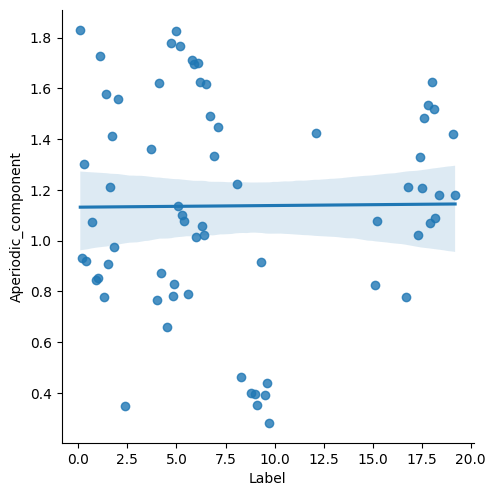

Sbj ID:  2887


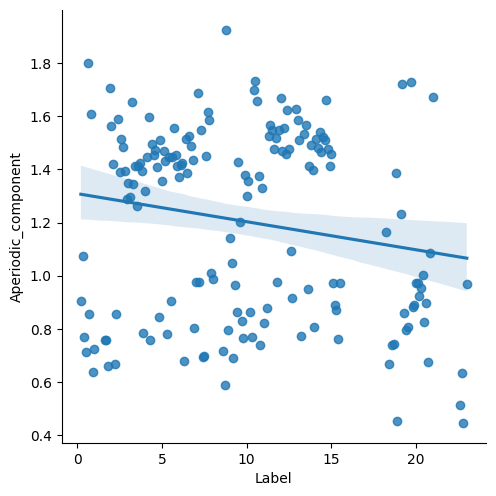

Sbj ID:  6351


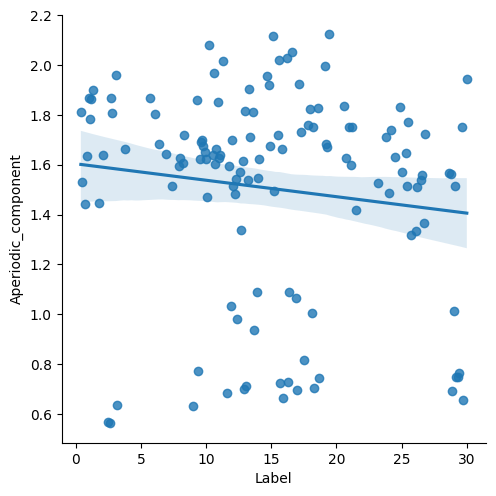

Sbj ID:  1256


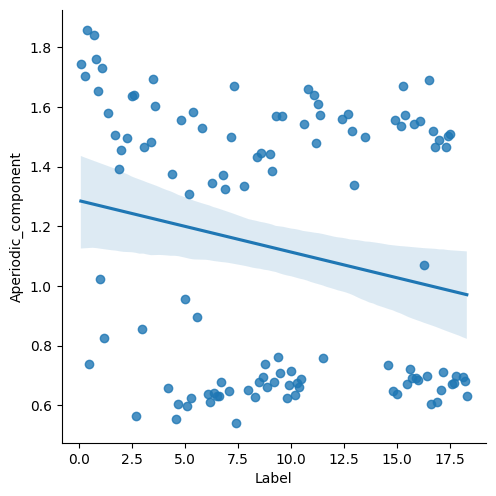

In [43]:
# Try it on the 'Aperiodic_component' feature
show_feature_for_ransom_subjects(mydata, 'Aperiodic_component', 5)

Sbj ID:  3399


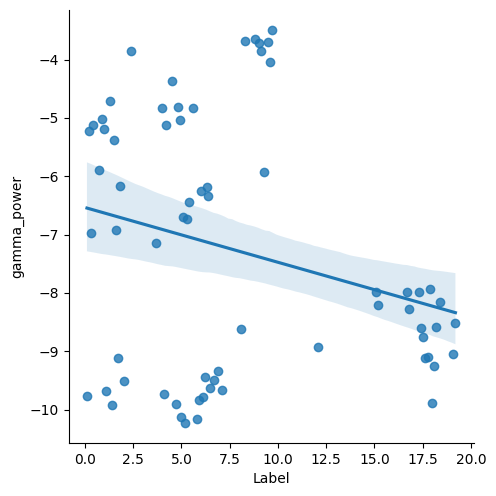

Sbj ID:  2887


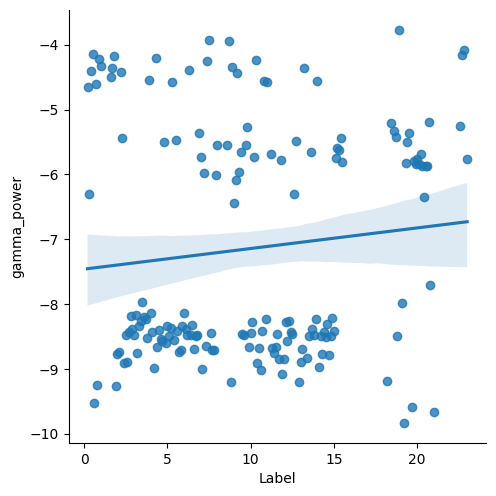

Sbj ID:  6351


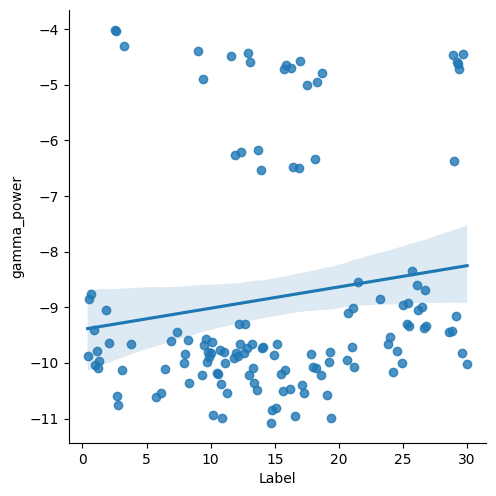

Sbj ID:  1256


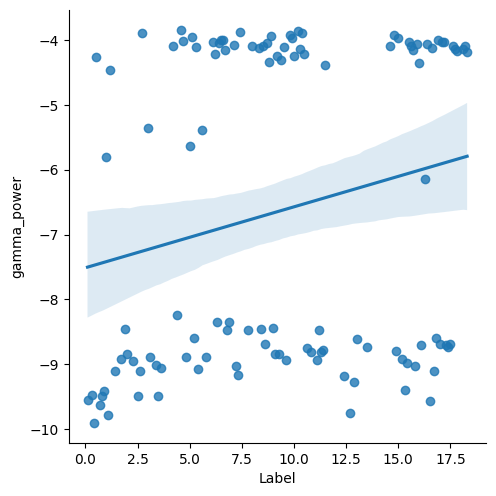

Sbj ID:  4888


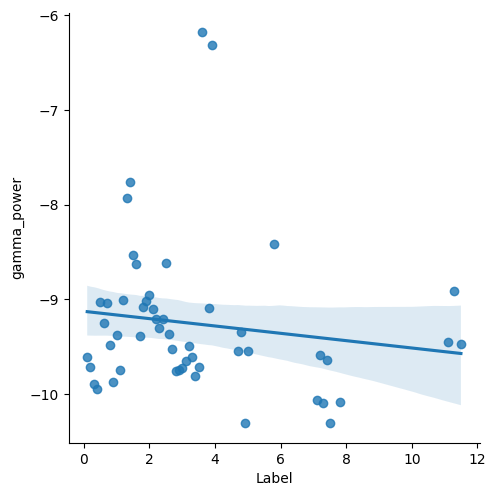

Sbj ID:  3021


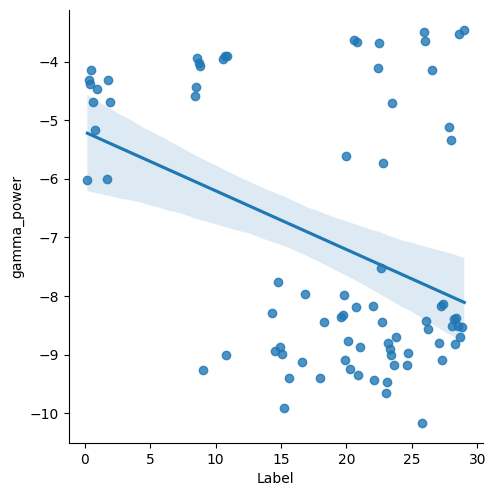

Sbj ID:  4715


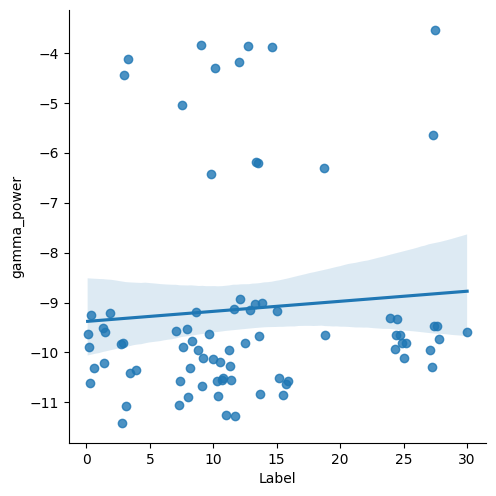

Sbj ID:  3267


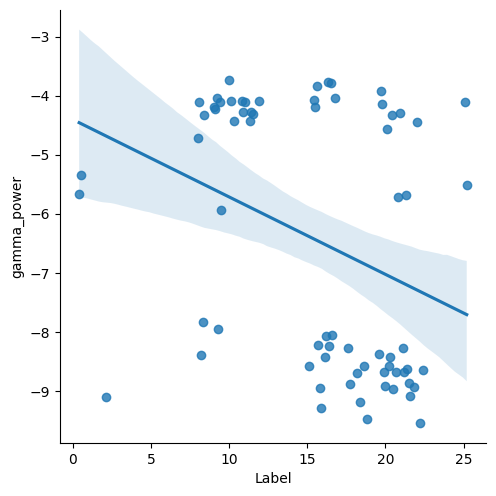

Sbj ID:  10


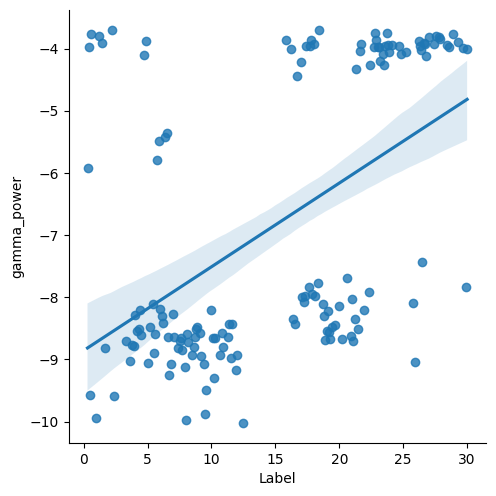

In [44]:
# Try it on the 'Aperiodic_component' feature
show_feature_for_ransom_subjects(mydata, 'gamma_power', 10)